### Food Delivery Time Prediction

Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

#### 1.Problem Statement
Food delivery companies need to accurately estimate delivery times to enhance customer satisfaction and improve logistics. The goal is to build a predictive model that estimates how long a food order will take to be delivered after it is placed.

#### 2.Data Collection
- Dataset Source - https://www.kaggle.com/datasets/denkuznetz/food-delivery-time-prediction
- The data consists of 9 columns and 1000 rows.

2.1 Import Data and Required Packages

Importing necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/food.csv')

Display first five records

In [3]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


Shape of the dataset

In [4]:
df.shape

(1000, 9)

2.2 Dataset information

Order_ID: Unique identifier for each order.

Distance_km: The delivery distance in kilometers.

Weather: Weather conditions during the delivery, including Clear, Rainy, Snowy, Foggy, and Windy.

Traffic_Level: Traffic conditions categorized as Low, Medium, or High.

Time_of_Day: The time when the delivery took place, categorized as Morning, Afternoon, Evening, or Night.

Vehicle_Type: Type of vehicle used for delivery, including Bike, Scooter, and Car.

Preparation_Time_min: The time required to prepare the order, measured in minutes.

Courier_Experience_yrs: Experience of the courier in years.

Delivery_Time_min: The total delivery time in minutes (target variable).

3. Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

3.1 Check Missing values

In [5]:
df.isna().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [6]:
# Dropping order id  
df.drop(['Order_ID'],axis=1,inplace=True)

In [7]:
# Fill categorical columns with mode
for col in ['Weather', 'Traffic_Level', 'Time_of_Day']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill numerical column with median
df['Courier_Experience_yrs'] = df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].median())

In [8]:
print(df.isna().sum())

Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64


There are no missing values in the data set

3.2 Check Duplicates

In [9]:
df.duplicated().sum()

0

There are no duplicates values in the data set

3.3 Check Datatypes

In [10]:
#Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance_km             1000 non-null   float64
 1   Weather                 1000 non-null   object 
 2   Traffic_Level           1000 non-null   object 
 3   Time_of_Day             1000 non-null   object 
 4   Vehicle_Type            1000 non-null   object 
 5   Preparation_Time_min    1000 non-null   int64  
 6   Courier_Experience_yrs  1000 non-null   float64
 7   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


3.4 Checking the number of unique values of each column

In [11]:
df.nunique()

Distance_km               785
Weather                     5
Traffic_Level               3
Time_of_Day                 4
Vehicle_Type                3
Preparation_Time_min       25
Courier_Experience_yrs     10
Delivery_Time_min         108
dtype: int64

3.5 Check statistics of data set

In [12]:
df.describe()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,10.059970,16.982000,4.592000,56.732000
std,5.696656,7.204553,2.871198,22.070915
min,0.590000,5.000000,0.000000,8.000000
25%,5.105000,11.000000,2.000000,41.000000
50%,10.190000,17.000000,5.000000,55.500000
75%,15.017500,23.000000,7.000000,71.000000
max,19.990000,29.000000,9.000000,153.000000


Insight
- From above description of numerical data, mean of courier experience in years is around 4.59, while distance in km and preparation time in min are around 10 and 16.98, whereas delivery time in min is around 56.7;
- All standard deviations are close for distance and preparation time- between 5.69 and 7.2, courier experience has lower-2.87 and delivery time has much higher-22.07;
- While there is a minimum score 0.0 for courier experience and 0.59 for distance, for preparation time minimum is higher = 5 and for delivery time minimum much higher = 8

3.6 Exploring Data

In [13]:
print("Categories in 'weather' variable:     ",end=" " )
print(df['Weather'].unique())

print("Categories in 'traffic level' variable:  ",end=" ")
print(df['Traffic_Level'].unique())

print("Categories in 'time of day' variable:",end=" " )
print(df['Time_of_Day'].unique())

print("Categories in 'vehicle type' variable:     ",end=" " )
print(df['Vehicle_Type'].unique())

Categories in 'weather' variable:      ['Windy' 'Clear' 'Foggy' 'Rainy' 'Snowy']
Categories in 'traffic level' variable:   ['Low' 'Medium' 'High']
Categories in 'time of day' variable: ['Afternoon' 'Evening' 'Night' 'Morning']
Categories in 'vehicle type' variable:      ['Scooter' 'Bike' 'Car']


In [14]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']

We have 4 categorical features : ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']


4. Exploring Data ( Visualization )

4.1 Univariate Analysis

a) Delivery time in minutes

Text(0.5, 1.0, 'Distribution of Delivery Time (min)')

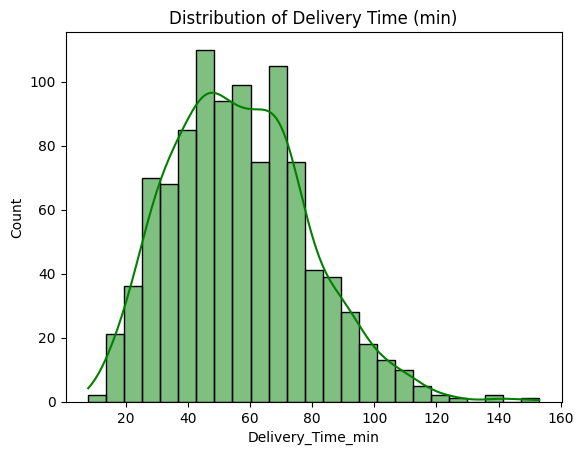

In [15]:
sns.histplot(df['Delivery_Time_min'], kde=True, color='green')
plt.title("Distribution of Delivery Time (min)")

Insights
- The majority of deliveries are completed in approximately 40-60 minutes, as indicated by the peak of the histogram. However, the distribution is slightly right-skewed, meaning there are a few cases with significantly longer delivery times—likely due to extreme weather, high traffic, or very long distances.

b) Weather Distribution

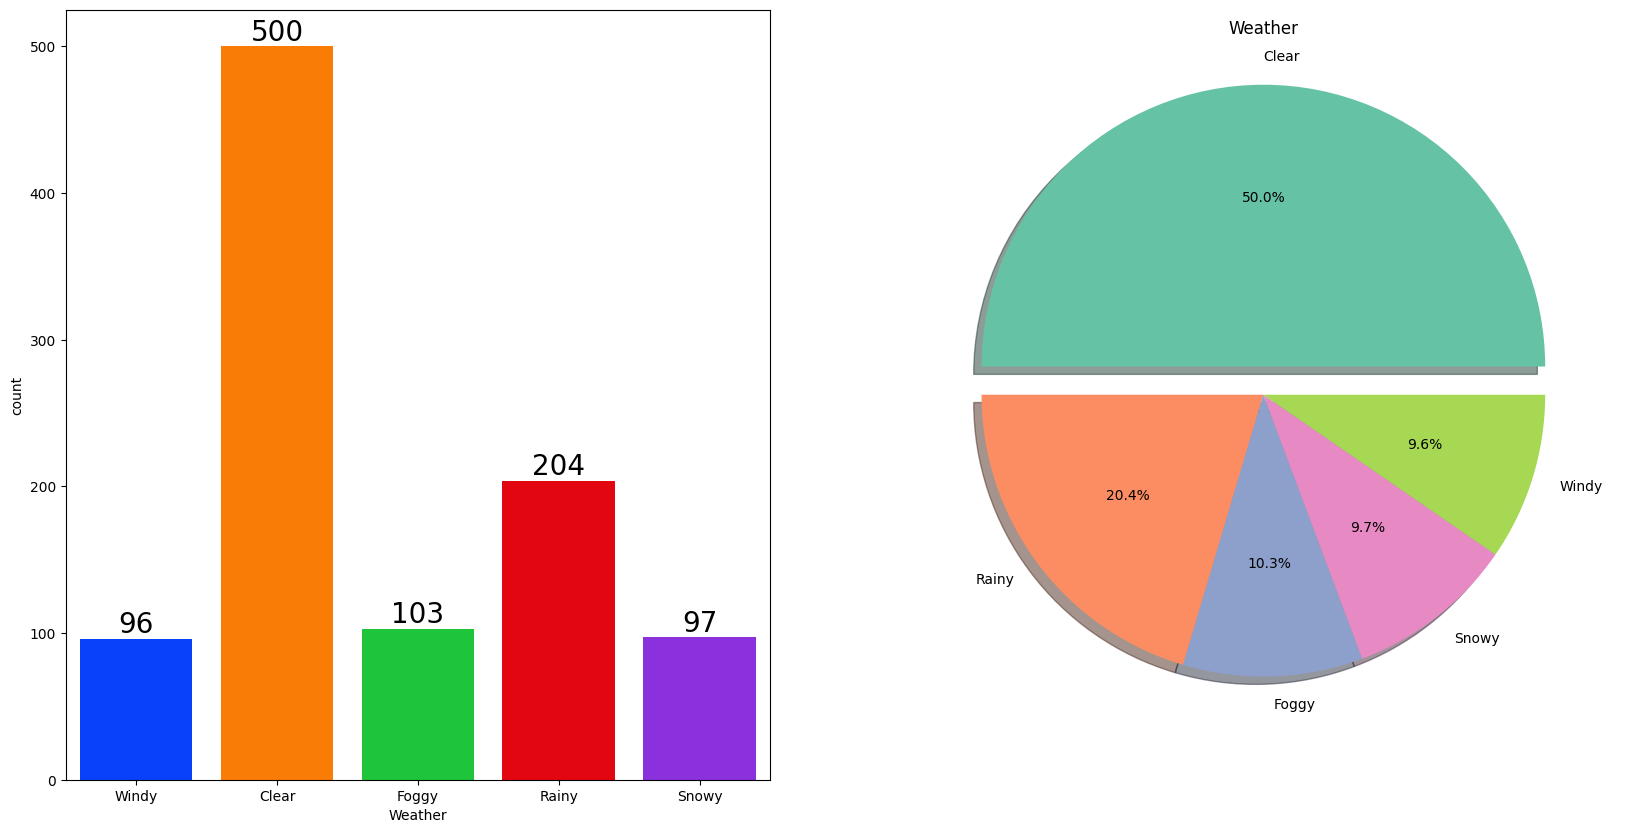

In [16]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Weather'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['Weather'].value_counts(),explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True,labels=df['Weather'].value_counts().index,colors=plt.cm.Set2.colors)
plt.title('Weather')
plt.show()

Insights

- The majority of food deliveries occur under Clear weather, indicating that most deliveries happen in favorable conditions.
- Windy and Snowy are the least common.

c) Traffic Level Distribution

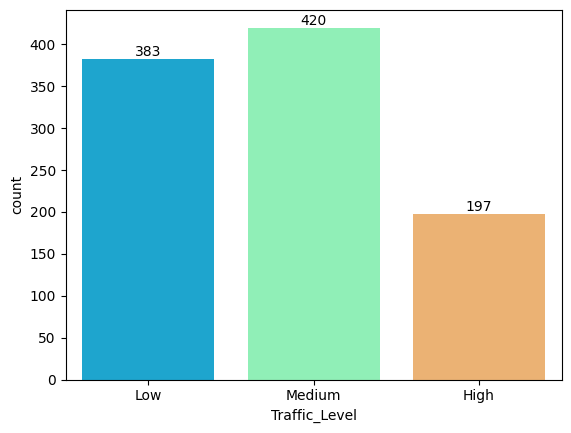

In [17]:
ax=sns.countplot(x='Traffic_Level',data=df,palette ='rainbow')
for bars in ax.containers:
    ax.bar_label(bars)

Insights

- Medium and low traffic levels are the most common conditions for deliveries, with high traffic occurring less frequently.
- This suggests that most deliveries are made in relatively manageable traffic environments.

d) Time of Day Distribution

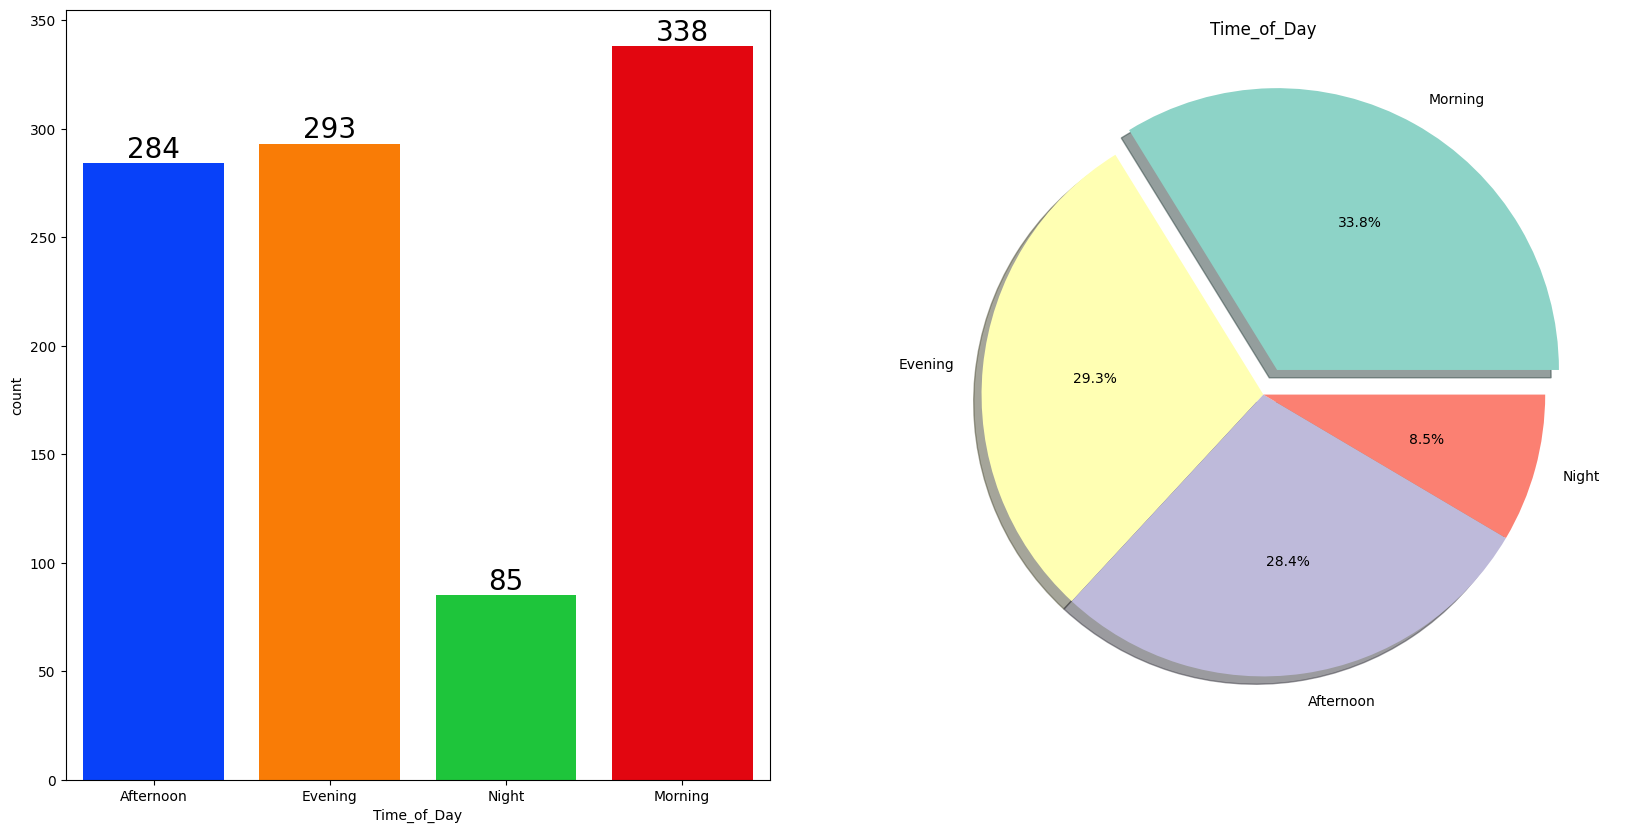

In [18]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Time_of_Day'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['Time_of_Day'].value_counts(),explode=[0.1,0,0,0],autopct='%1.1f%%',shadow=True,labels=df['Time_of_Day'].value_counts().index,colors=plt.cm.Set3.colors)
plt.title('Time_of_Day')
plt.show()

Insights

- Morning is the busiest time for deliveries, followed closely by Evening and Afternoon.
- Night has significantly fewer deliveries—likely due to lower demand and limited service hours during late-night periods.


e) Vehicle Type Distribution

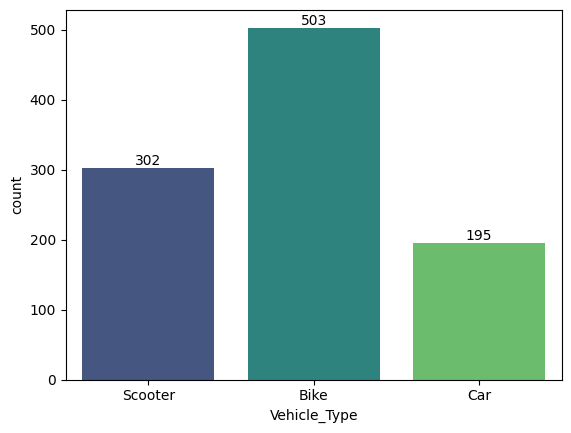

In [19]:
ax=sns.countplot(x='Vehicle_Type',data=df,palette ='viridis')
for bars in ax.containers:
    ax.bar_label(bars)

Insights

- Bikes dominate food delivery operations, far surpassing Scooters and Cars.

4.2 Bivariate Categorical Analysis
- a) Traffic level vs Delivery Time

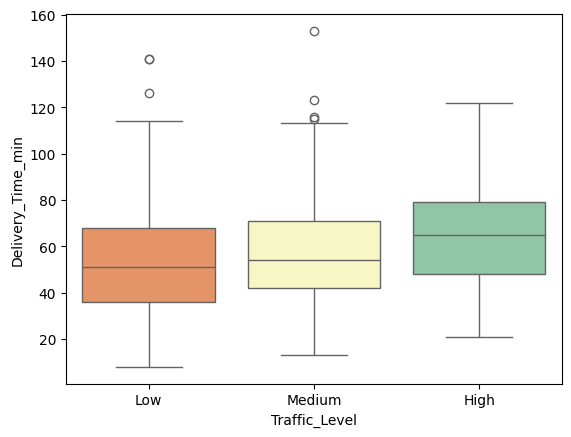

In [20]:
sns.boxplot(x='Traffic_Level',y='Delivery_Time_min',data=df,palette='Spectral');

Insights 

As traffic level increases, so does the delivery time.
- Deliveries under Low traffic have the shortest median time and narrowest spread, suggesting more consistent and efficient deliveries.
- Under Medium traffic, delivery times become more variable, and the median increases.
- High traffic results in the longest median delivery times and more outliers, indicating frequent delays and unpredictability.


b) Weather vs Delivery Time

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Windy'),
  Text(1, 0, 'Clear'),
  Text(2, 0, 'Foggy'),
  Text(3, 0, 'Rainy'),
  Text(4, 0, 'Snowy')])

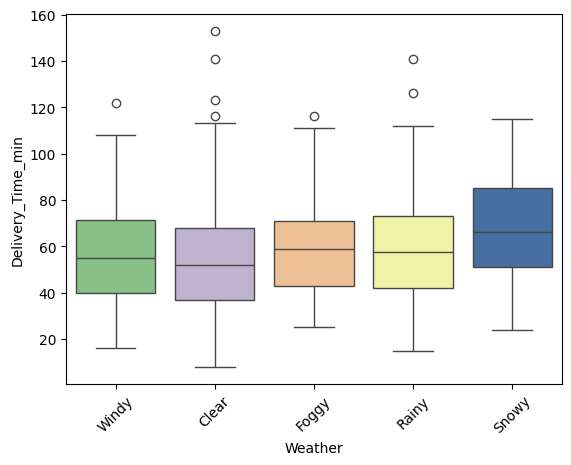

In [21]:
sns.boxplot(x='Weather',y='Delivery_Time_min',data=df,palette='Accent');
plt.xticks(rotation=45)

Insights

Adverse weather conditions significantly affect delivery times.
- Under Clear weather, delivery times are the lowest and most consistent, with a lower median and tighter interquartile range.
- Rainy and Snowy conditions lead to higher median delivery times and a wider spread, indicating slower and less predictable deliveries.
- Foggy and Windy conditions also show elevated delivery times compared to Clear weather, though the impact may be moderate depending on severity.


c) Time of Day Impact

<Axes: xlabel='Time_of_Day', ylabel='Delivery_Time_min'>

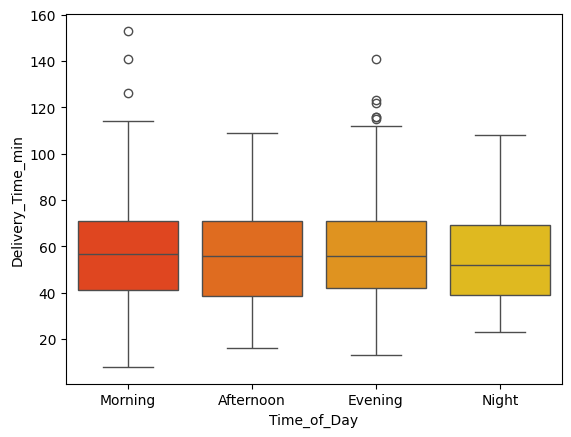

In [22]:
sns.boxplot(x='Time_of_Day', y='Delivery_Time_min', data=df, order=['Morning', 'Afternoon', 'Evening', 'Night'],palette='autumn')

Insights

Delivery time varies throughout the day.
- Morning deliveries have the lowest median delivery time and a relatively narrow range, suggesting fast and consistent deliveries, likely due to lighter traffic and fewer orders.
- Afternoon deliveries take slightly longer, with more variability—possibly due to increased order volume during lunch hours.
- Evening deliveries show the highest median and widest spread, indicating delays are common during this time—likely due to peak demand and traffic congestion.
- Night deliveries, while fewer, tend to be slightly faster than evening but still slower than morning—possibly due to reduced traffic but limited courier availability.


d) Vehicle Type Efficiency

<Axes: xlabel='Vehicle_Type', ylabel='Delivery_Time_min'>

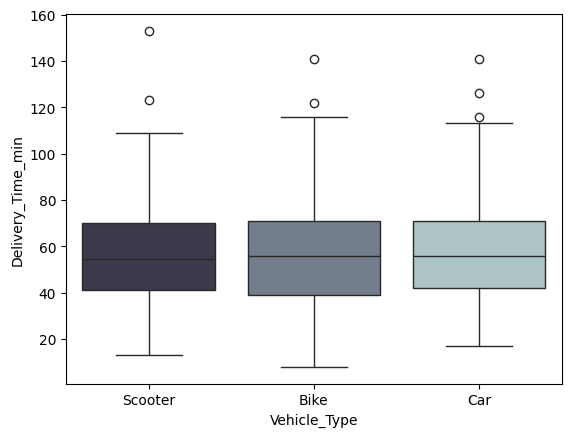

In [23]:
sns.boxplot(x='Vehicle_Type', y='Delivery_Time_min', data=df,palette='bone')

Insights

Delivery performance varies significantly across vehicle types.
- Bikes typically have the lowest median delivery time, likely due to their agility and ability to bypass traffic in urban areas.
- Scooters also perform well, with slightly higher delivery times than bikes but better than cars.
- Cars have the highest median delivery time and a wider range, suggesting more delays—possibly due to traffic congestion, parking issues, or less maneuverability in dense city areas.


4.3 Bivariate Numerical Analysis

a) Delivery Time vs Distance

<Axes: xlabel='Distance_km', ylabel='Delivery_Time_min'>

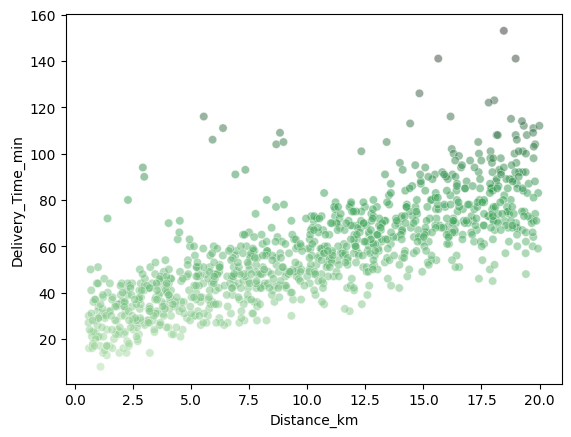

In [30]:
sns.scatterplot(x='Distance_km', y='Delivery_Time_min', hue='Delivery_Time_min',data=df, alpha=0.5,palette='Greens_d',legend=False)

Insights
- It reveals a clear positive relationship between Distance_km and Delivery_Time_min.
- As the delivery distance increases, the delivery time also tends to increase.
- This indicates that distance is a key driver of delivery time and should be treated as a primary predictive feature.
- However, there is noticeable variability, especially at shorter distances, where some deliveries still take longer. This suggests that other factors—such as traffic conditions, preparation time, or vehicle type—also contribute to delivery delays.

b) Preparation time vs Delivery time

<Axes: xlabel='Preparation_Time_min', ylabel='Delivery_Time_min'>

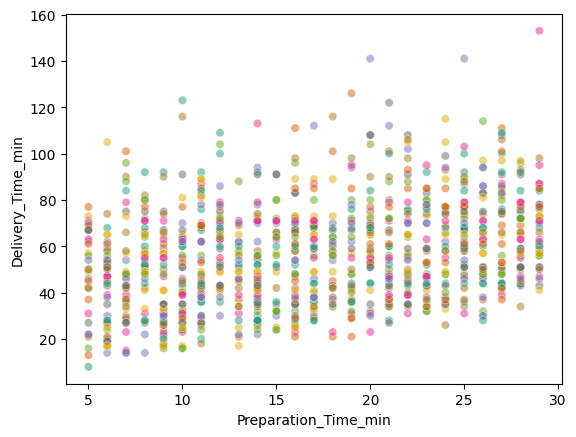

In [34]:
sns.scatterplot(x='Preparation_Time_min',y='Delivery_Time_min',hue='Delivery_Time_min',data=df, alpha=0.5,palette='Dark2',legend=False)

Insights  

Shows a moderate positive relationship between Preparation_Time_min and Delivery_Time_min.
- As preparation time increases, the overall delivery time also tends to increase, which is expected since preparation is part of the total delivery duration.
- However, the spread of points indicates that preparation time alone doesn’t fully explain delivery delays.
- This means while it's an important component, external factors like traffic, weather, and delivery distance also significantly influence the final delivery time.

4.4 Multivariate Categorical Analysis using Pieplot

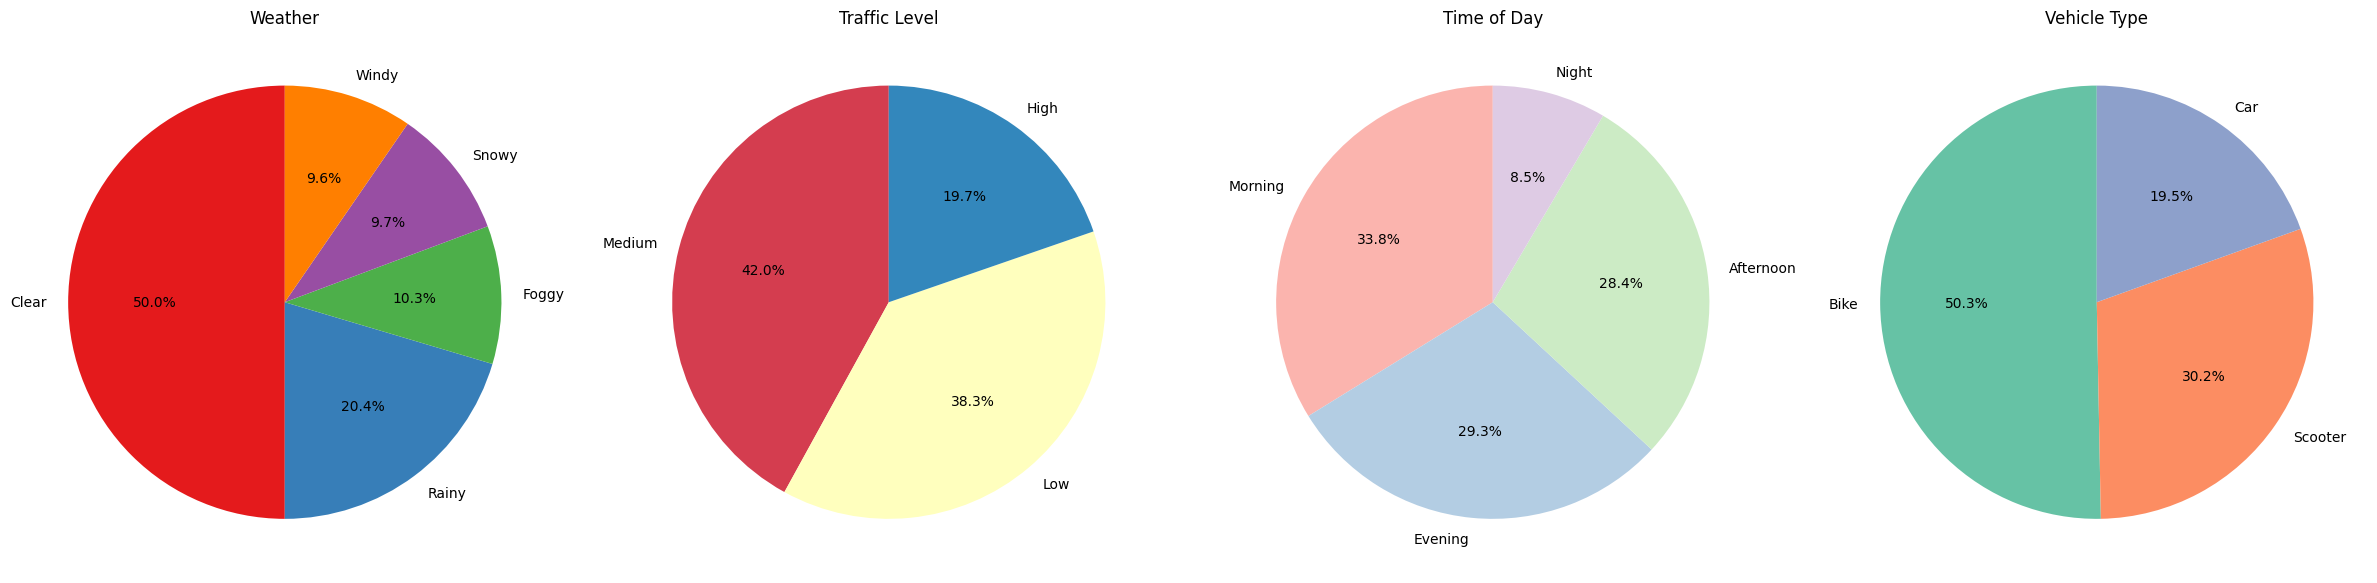

In [46]:
plt.rcParams['figure.figsize'] = (30, 16)

plt.subplot(1, 5, 1)
df['Weather'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Set1.colors)
plt.title('Weather')
plt.axis('off')

plt.subplot(1, 5, 2)
df['Traffic_Level'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Spectral(np.linspace(0.1, 0.9, df['Traffic_Level'].nunique())))
plt.title('Traffic Level')
plt.axis('off')

plt.subplot(1, 5, 3)
df['Time_of_Day'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title('Time of Day')
plt.axis('off')

plt.subplot(1, 5, 4)
df['Vehicle_Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Set2.colors)
plt.title('Vehicle Type')
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

Insights

- Weather: Clear weather is the most common condition for deliveries, providing generally favorable conditions.
- Traffic Level: Most deliveries occur under medium traffic, indicating moderate congestion is typical.
- Time of Day: The afternoon sees the highest volume of deliveries, likely due to lunch-hour demand.
- Vehicle Type: Bikes are the most frequently used delivery vehicle, suggesting efficiency in urban settings.

4.5 Multivariate Numerical Analysis

a) Correlation Heatmap

<Axes: >

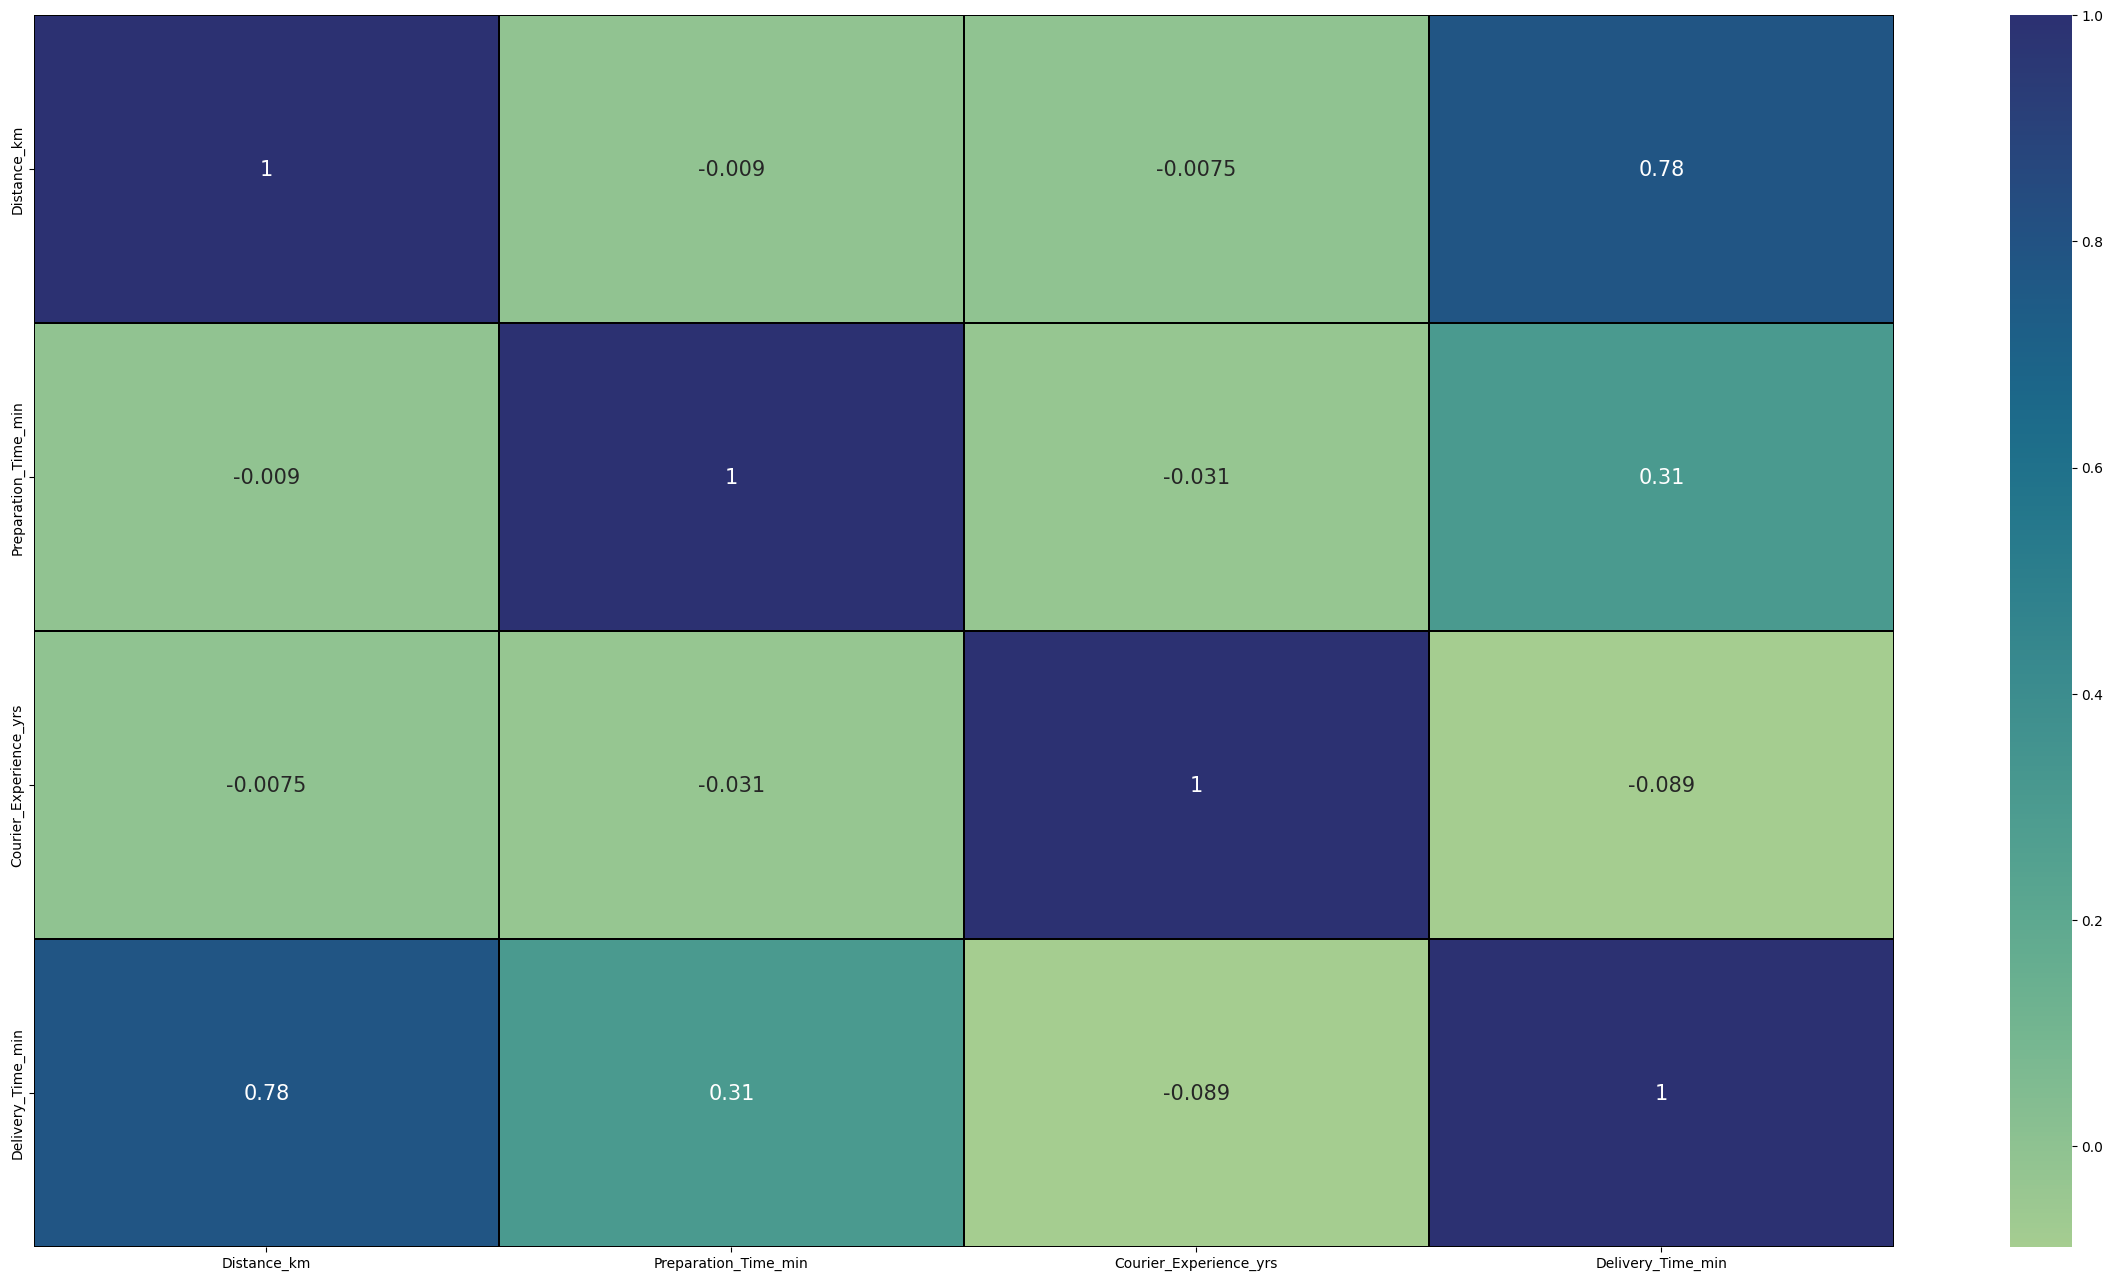

In [43]:
data=df[['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']]
sns.heatmap(data.corr(),annot=True,cmap='crest',linewidths=0.3, linecolor='black',annot_kws={"size":15})

Insights

The correlation heatmap provides valuable insight into how numerical features are related to each other and to the target variable (Delivery_Time_min):
- Distance_km shows a strong positive correlation with Delivery_Time_min (0.78), confirming that longer distances lead to longer delivery times.
- Preparation_Time_min has a moderate positive correlation with Delivery_Time_min (0.3), indicating that orders that take longer to prepare also generally take longer to deliver.
- Courier_Experience_yrs typically shows a slight negative correlation with Delivery_Time_min (-0.089), suggesting that more experienced couriers tend to complete deliveries faster, but the impact is not dominant.
- There is low correlation between Courier_Experience_yrs and other input features, indicating it contributes unique information to the model.

b) Pairplot

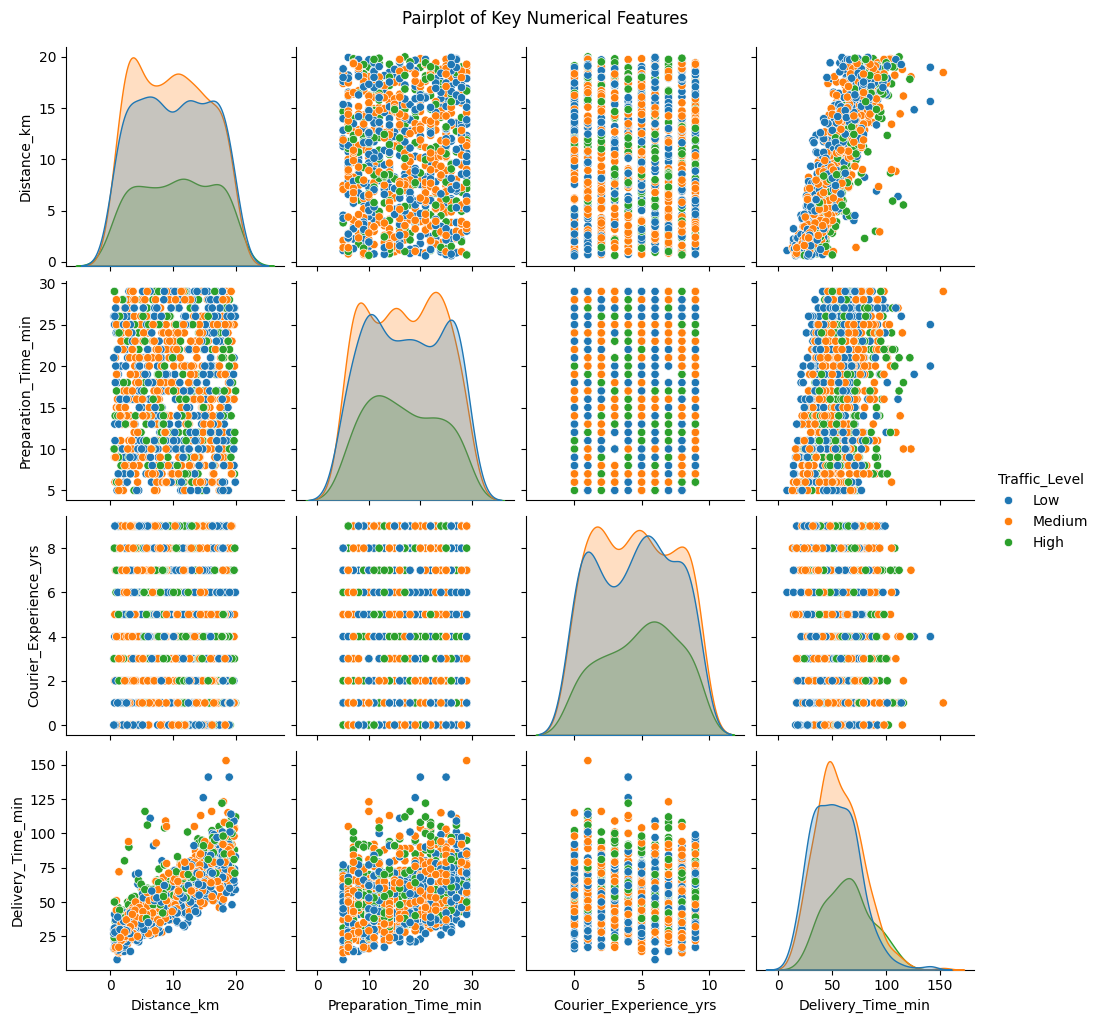

In [44]:
sns.pairplot(df,hue='Traffic_Level');
plt.suptitle('Pairplot of Key Numerical Features', y=1.02)
plt.show()

Insights

The pairplot reveals clear relationships among the numeric features:
- Distance_km vs Delivery_Time_min: Shows a strong positive linear trend—confirming that longer distances result in longer delivery times.
- Preparation_Time_min vs Delivery_Time_min: A moderate upward trend, indicating longer preparation contributes to longer total delivery.
- Courier_Experience_yrs vs Delivery_Time_min: Displays a slightly negative slope, suggesting that more experienced couriers complete deliveries a bit faster.
- Under High traffic levels, delivery times tend to be longer and more spread out, especially at longer distances or higher preparation times.

Conclusions

- Most deliveries are completed within 40–60 minutes.
- Higher traffic leads to longer delivery times.
- Rainy and snowy weather increase delivery durations.
- Cars have longer delivery times than bikes and scooters.
- Delivery time increases with distance traveled.
- Longer preparation time moderately increases delivery time.
- More experienced couriers deliver slightly faster.
- Distance is the strongest numerical driver of delivery time.
- Mornings see the highest number of deliveries.
- Distance, traffic level, weather, vehicle type, and preparation time are key drivers of delivery time.